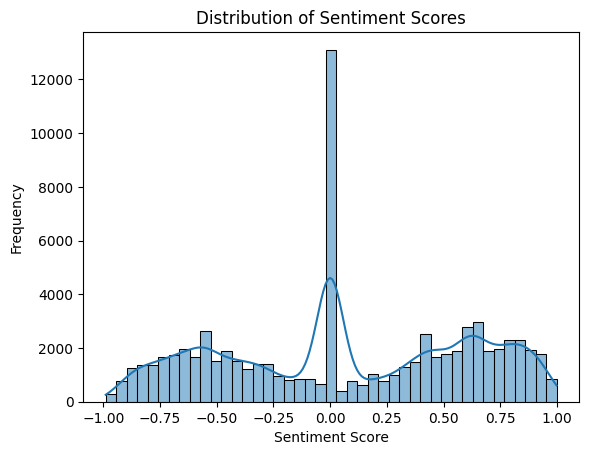

In [ ]:
# Install the necessary libraries
!pip install pandas matplotlib seaborn vaderSentiment

# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
data = pd.read_csv('twitter_training.csv', header=None, names=['id', 'entity', 'sentiment', 'text'])

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score of a tweet
def get_sentiment_score(tweet):
    # Handle potential non-string values
    if isinstance(tweet, str):
        sentiment_score = analyzer.polarity_scores(tweet)['compound']
        return sentiment_score
    else:
        return None  # Or handle non-string values as needed

# Calculate the sentiment score for each tweet, ensuring 'text' column contains strings
data['sentiment_score'] = data['text'].astype(str).apply(get_sentiment_score)

# Visualize the distribution of sentiment scores
sns.histplot(data['sentiment_score'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()